## Visualize F1 scores

For predicting different single-cell phenotypes.

Training and testing curves for the following feature spaces:

1. CellProfiler
2. DeepProfiler (LUAD)
3. Combined CP and DP (LUAD)

In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))

# Load figure themes and colors
source("figure_themes.R")

In [2]:
# Set output files
output_file <- file.path(
    "figures", "f1_scores_multiclass.png"
)

In [3]:
# Load data
results_dir <- file.path(
    "..", "3.evaluate_model", "evaluations", "F1_scores"
)
results_file <- file.path(results_dir, "compiled_F1_scores.tsv")

f1_score_df <- readr::read_tsv(
    results_file,
    col_types = readr::cols(
        .default = "d",
        "Phenotypic_Class" = "c",
        "data_split" = "c",
        "shuffled" = "c",
        "feature_type" = "c"
    )
) %>%
    dplyr::select(!`...1`) %>%
    dplyr::mutate(feature_type_with_data_split = paste0(feature_type, data_split)) %>%
    dplyr::filter(
        data_split == "test",
        shuffled == "False"
    )

print(dim(f1_score_df))
head(f1_score_df)

New names:
• `` -> `...1`


[1] 48  6


Phenotypic_Class,F1_Score,data_split,shuffled,feature_type,feature_type_with_data_split
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
ADCCM,0.8965517,test,False,CP,CPtest
Anaphase,0.8461538,test,False,CP,CPtest
Apoptosis,0.8095238,test,False,CP,CPtest
Binuclear,0.7272727,test,False,CP,CPtest
Elongated,0.9090909,test,False,CP,CPtest
Grape,0.6363636,test,False,CP,CPtest


In [4]:
# How many of the phenotypic classes are certain feature types the best?
top_scores_df <- f1_score_df %>%
    dplyr::arrange(desc(F1_Score)) %>%
    dplyr::group_by(Phenotypic_Class) %>%
    dplyr::slice(1)

print(table(top_scores_df$feature_type_with_data_split))

top_scores_df


CP_and_DPtest        CPtest        DPtest 
           10             3             3 


Phenotypic_Class,F1_Score,data_split,shuffled,feature_type,feature_type_with_data_split
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
ADCCM,0.9333333,test,False,DP,DPtest
Anaphase,0.9285714,test,False,CP_and_DP,CP_and_DPtest
Apoptosis,0.9156627,test,False,CP_and_DP,CP_and_DPtest
Binuclear,0.7272727,test,False,CP,CPtest
Elongated,0.9375000,test,False,CP_and_DP,CP_and_DPtest
Grape,0.6956522,test,False,DP,DPtest
Hole,0.7741935,test,False,CP,CPtest
Interphase,0.8455285,test,False,CP_and_DP,CP_and_DPtest
Large,0.7407407,test,False,CP,CPtest


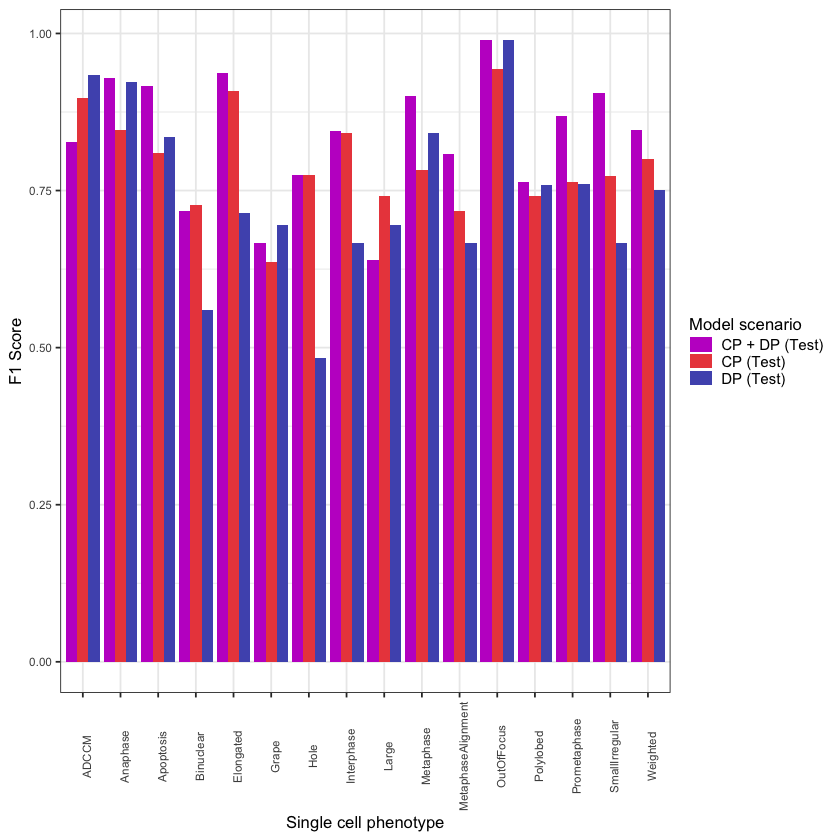

In [5]:
f1_score_gg <- (
    ggplot(f1_score_df, aes(x = Phenotypic_Class, y = F1_Score))
    + geom_bar(aes(fill = feature_type_with_data_split), stat = "identity", position = "dodge")
    + theme_bw()
    + xlab("Single cell phenotype")
    + ylab("F1 Score")
    + scale_fill_manual(
        name = "Model scenario",
        labels = feature_type_with_data_split_labels,
        values = feature_type_with_data_split_colors
    )
    + figure_theme
    # Decrease spacing in legend and rotate text
    + theme(
        legend.spacing.y = unit(0.1, "cm"),
        legend.box.spacing = unit(0.2, "cm"),
        legend.key.size = unit(0.7, "lines"),
        legend.key.width = unit(1, "lines"),
        axis.text.x = element_text(angle = 90)
    )
)

ggsave(output_file, f1_score_gg, height = 3, width = 6, dpi = 500)

f1_score_gg